<a href="https://colab.research.google.com/github/olley102/CommunityDetectionURSS/blob/main/object_tracking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Object tracking

Tracking persistent objects via cosine similarity of optical flow vectors.

In [ ]:
!git clone https://github.com/olley102/CommunityDetectionURSS.git

Cloning into 'CommunityDetectionURSS'...
remote: Enumerating objects: 304, done.
remote: Counting objects: 100% (97/97), done.
remote: Compressing objects: 100% (61/61), done.
remote: Total 304 (delta 65), reused 65 (delta 35), pack-reused 207
Receiving objects: 100% (304/304), 8.17 MiB | 18.35 MiB/s, done.
Resolving deltas: 100% (160/160), done.


In [ ]:
import sys
sys.path.append('/content/CommunityDetectionURSS')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np

In [ ]:
dbscan_labels0 = np.load('/content/drive/My Drive/Colab Notebooks/Files/dbscan_labels.npy')
dbscan_labels1 = np.load('/content/drive/My Drive/Colab Notebooks/Files/dbscan_labels1.npy')

In [ ]:
from image_processing import optical_flow as optflo

In [ ]:
!pip install rasterio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.3 MB 1.2 MB/s 


In [ ]:
import automate_project as app

In [ ]:
data_fp = '/content/drive/My Drive/GoogleEarthEngine/GPW_v411_pc_time{}.tif'
checkpoint_fp = '/content/checkpoints/checkpoint_{frame}_{epoch}.hdf5'

In [ ]:
proj = app.Project(data_fp, checkpoint_fp, 5)

In [ ]:
proj.load_data()

In [ ]:
label_pos0 = [np.array(np.where(dbscan_labels0 == k)).T
              for k in range(int(dbscan_labels0.max()+1))]
label_pos1 = [np.array(np.where(dbscan_labels1 == k)).T
              for k in range(int(dbscan_labels1.max()+1))]

In [ ]:
assignments = optflo.object_tracking(
    proj.images[..., 0], proj.images[..., 1],
    label_pos0, label_pos1,
    n=1, alpha=10, direction=0
)

In [ ]:
assignment1 = optflo.object_tracking(
    proj.images[..., 0], proj.images[..., 1],
    label_pos0, label_pos1,
    n=1, alpha=10, direction=1
)

/content/CommunityDetectionURSS/image_processing/optical_flow.py:267: RuntimeWarning: invalid value encountered in true_divide
  norm1 = uv_vec1 / LA.norm(uv_vec1, axis=0)
/content/CommunityDetectionURSS/image_processing/optical_flow.py:268: RuntimeWarning: invalid value encountered in true_divide
  norm2 = uv_vec2 / LA.norm(uv_vec2, axis=0)


In [ ]:
assignment2 = optflo.object_tracking(
    proj.images[..., 0], proj.images[..., 1],
    label_pos0, label_pos1,
    n=1, alpha=10, direction=-1
)

/content/CommunityDetectionURSS/image_processing/optical_flow.py:267: RuntimeWarning: invalid value encountered in true_divide
  norm1 = uv_vec1 / LA.norm(uv_vec1, axis=0)
/content/CommunityDetectionURSS/image_processing/optical_flow.py:268: RuntimeWarning: invalid value encountered in true_divide
  norm2 = uv_vec2 / LA.norm(uv_vec2, axis=0)


In [ ]:
import matplotlib.pyplot as plt

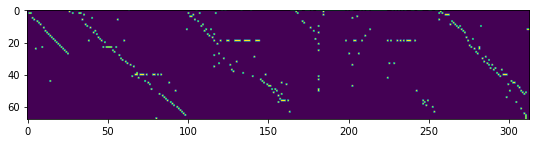

In [ ]:
fig = plt.figure(figsize=(9, 16))
ax = fig.add_subplot()
ax.imshow(assignments.T)

In [ ]:
import numpy.ma as ma

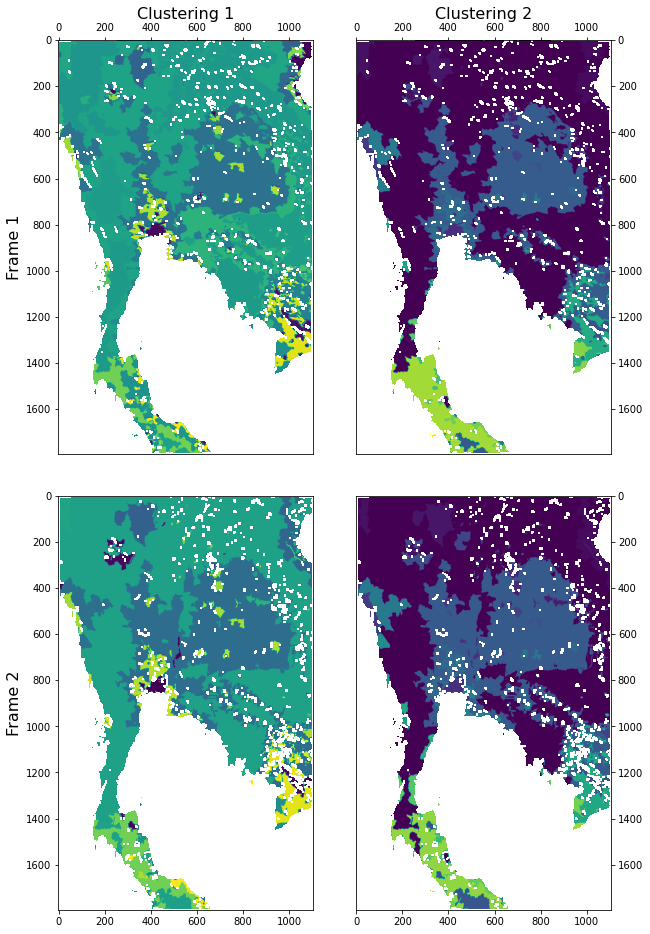

In [ ]:
fig = plt.figure(figsize=(16, 16))

ax1 = fig.add_subplot(221)
assign_1_1 = -np.ones(proj.images.shape[:2], dtype='int')
for i, p in enumerate(label_pos0):
  assign_1_1[p[:, 0], p[:, 1]] = i
assign_1_1 = ma.masked_equal(assign_1_1, -1)
ax1.imshow(assign_1_1)
ax1.set_xlabel('Clustering 1', fontsize=16)
ax1.xaxis.set_label_position('top')
ax1.xaxis.tick_top()
ax1.set_ylabel('Frame 1', fontsize=16)

ax2 = fig.add_subplot(222)
assign_1_2 = -np.ones(proj.images.shape[:2], dtype='int')
for i, c in enumerate(assignment1):
  p = label_pos0[i]
  assign_1_2[p[:, 0], p[:, 1]] = c
assign_1_2 = ma.masked_equal(assign_1_2, -1)
ax2.imshow(assign_1_2)
ax2.set_xlabel('Clustering 2', fontsize=16)
ax2.xaxis.tick_top()
ax2.xaxis.set_label_position('top')
ax2.yaxis.tick_right()

ax3 = fig.add_subplot(223)
assign_2_1 = -np.ones(proj.images.shape[:2], dtype='int')
for i, c in enumerate(assignment2):
  p = label_pos1[i]
  assign_2_1[p[:, 0], p[:, 1]] = c
assign_2_1 = ma.masked_equal(assign_2_1, -1)
ax3.imshow(assign_2_1)
ax3.set_ylabel('Frame 2', fontsize=16)

ax4 = fig.add_subplot(224)
assign_2_2 = -np.ones(proj.images.shape[:2], dtype='int')
for i, p in enumerate(label_pos1):
  assign_2_2[p[:, 0], p[:, 1]] = i
assign_2_2 = ma.masked_equal(assign_2_2, -1)
ax4.imshow(assign_2_2)
ax4.yaxis.tick_right()

fig.subplots_adjust(wspace=-0.5, hspace=0.1)
fig.savefig('object_tracking_1_2')

In [ ]:
images = proj.images[..., :2]

In [ ]:
forward_uv = optflo.iteration(images, n=1, alpha=10, centering=(0, 0, 1))
backward_uv = optflo.iteration(images, n=1, alpha=10, centering=(0, 0, -1))

In [ ]:
assignments = np.zeros(len(label_pos0))

In [ ]:
coords1 = label_pos0[116]
sim_max = 0
arg_max = 0

In [ ]:
coords2 = label_pos1[19]

In [ ]:
coords1.shape

(192118, 2)

In [ ]:
coords2.shape

(316312, 2)

In [ ]:
coords1_ravel = np.ravel_multi_index(coords1.T, (proj.images.shape[:2]))
coords2_ravel = np.ravel_multi_index(coords2.T, (proj.images.shape[:2]))

In [ ]:
intersection_ravel = np.intersect1d(coords1_ravel, coords2_ravel)

In [ ]:
intersection_ravel.shape

(183805,)

In [ ]:
intersection = np.unravel_index(intersection_ravel, proj.images.shape[:2])

In [ ]:
intersection = np.array(intersection).T

In [ ]:
intersection.shape

(183805, 2)

In [ ]:
uv_vec1 = forward_uv[:, intersection[:, 0], intersection[:, 1], 0]

In [ ]:
uv_vec1.shape

(2, 183805)

In [ ]:
uv_vec2 = backward_uv[:, intersection[:, 0], intersection[:, 1], 1]

In [ ]:
from numpy import linalg as LA

In [ ]:
norm1 = uv_vec1 / LA.norm(uv_vec1, axis=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


In [ ]:
norm2 = uv_vec2 / LA.norm(uv_vec2, axis=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


In [ ]:
norm1.shape

(2, 183805)

In [ ]:
norm2.shape

(2, 183805)

In [ ]:
norm1[np.isnan(norm1)] = 0.0
norm2[np.isnan(norm2)] = 0.0

In [ ]:
similarity = 0.0
for p in range(intersection.shape[0]):
  similarity += norm1[0, p] * norm2[0, p] + norm1[1, p] * norm2[1, p]

In [ ]:
similarity

183803.0